Merged datasets: Hotel Bookings and Google hotel ratings
---

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#File to load
hotel_bookings_file = Path("../Resources/hotel_bookings_dataset.csv")
google_ratings_file = Path("../Resources/hotel_ratings_bookings_APIdataset.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)
google_ratings_data = pd.read_csv(google_ratings_file)

Cleaning Hotel Bookings and Google Ratings Dataframe
---

In [3]:
# Remove specified columns from the hotel_data DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [4]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Rearrange the hotel_data columns
columns_order = [
    'country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename hotel_data columns
hotel_data = hotel_data.rename(columns={
    'country':'Country',
    'adr': 'Average daily rate',
    'hotel': 'Hotel type',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'total_stays_days': 'Total Days of Stays'
})

hotel_data

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


In [5]:
#convert abbreviation to country name in the hotel_data dataframe
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_data['Country'] = hotel_data['Country'].replace(country_mapping)

In [6]:
# Rename google_ratings_data columns
google_ratings_data = google_ratings_data.rename(columns={
        'Country Name':'Country'
})

google_ratings_data

,Country,Average Rating,Booking Frequency
0,Albania,4.420,88.4
1,Algeria,4.240,84.8
2,American Samoa,3.805,76.1
3,Andorra,4.295,85.9
4,Angola,4.185,83.7
...,...,...,...
169,Uzbekistan,4.470,89.4
170,Venezuela,4.470,89.4
171,Vietnam,4.375,87.5
172,Zambia,4.380,87.6


Merged dataframe
---

In [7]:
#combine the data into single dataframe
hotel_bookings_rating_df = pd.merge(hotel_data, google_ratings_data, how="left", on="Country")

#display data
hotel_bookings_rating_df

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type,Average Rating,Booking Frequency
0,Portugal,0.00,2015,July,0,Resort Hotel,4.445,88.9
1,Portugal,0.00,2015,July,0,Resort Hotel,4.445,88.9
2,United Kingdom,75.00,2015,July,1,Resort Hotel,3.880,77.6
3,United Kingdom,75.00,2015,July,1,Resort Hotel,3.880,77.6
4,United Kingdom,98.00,2015,July,2,Resort Hotel,3.880,77.6
...,...,...,...,...,...,...,...,...
119385,Belgium,96.14,2017,August,7,City Hotel,4.310,86.2
119386,France,225.43,2017,August,7,City Hotel,4.040,80.8
119387,Germany,157.71,2017,August,7,City Hotel,4.120,82.4
119388,United Kingdom,104.40,2017,August,7,City Hotel,3.880,77.6


Statistical Analysis
---

In [8]:
# Group by 'Country' and calculate total stays, average rating, and booking frequency
summary = hotel_bookings_rating_df.groupby('Country').agg(
    Total_Days_of_Stays=('Total Days of Stays', 'sum'),
    Average_Rating=('Average Rating', 'mean'),  # Assuming 'Rating' is the column with ratings in google_ratings_data
    Booking_Frequency=('Booking Frequency', 'mean')  # Assuming there's a 'Booking Frequency' column
).reset_index()

# Sort the summary by Total Days of Stays in descending order
top_countries = summary.sort_values(by='Total_Days_of_Stays', ascending=False).head(10)

# Display the results
top_countries

,Country,Total_Days_of_Stays,Average_Rating,Booking_Frequency
129,Portugal,141654,4.445,88.9
167,United Kingdom,58092,3.880,77.6
54,France,36547,4.040,80.8
149,Spain,26358,4.195,83.9
59,Germany,25787,4.120,82.4
76,Ireland,17366,4.400,88.0
79,Italy,12322,4.295,85.9
18,Belgium,8631,4.310,86.2
23,Brazil,7759,4.175,83.5
114,Netherlands,7740,4.375,87.5


Visualization
---

C:\Users\Hetumehulpra\AppData\Local\Temp\ipykernel_10624\771789053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Total_Days_of_Stays', y='Country', palette='viridis')


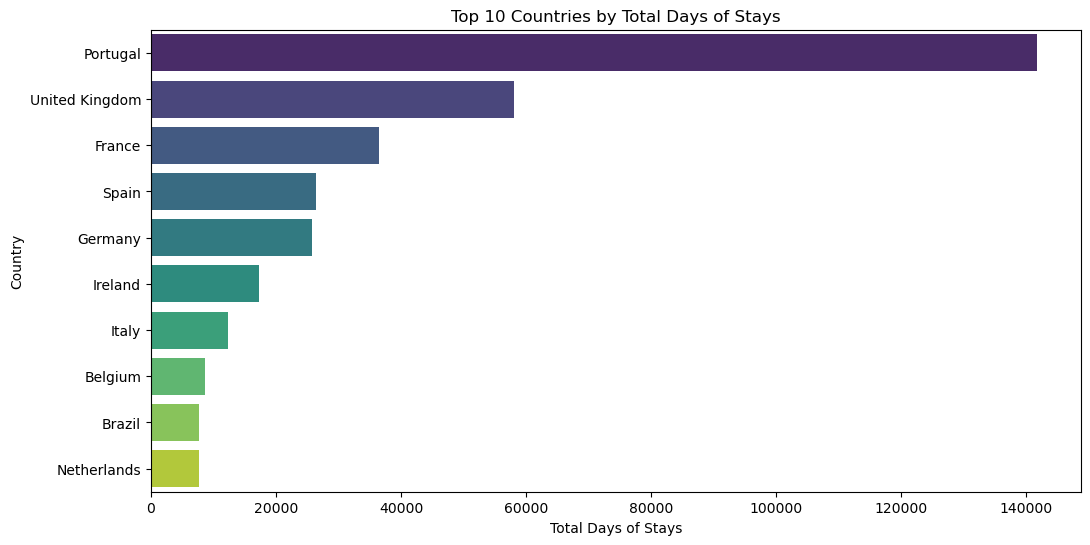

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Total_Days_of_Stays', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Days of Stays')
plt.xlabel('Total Days of Stays')
plt.ylabel('Country')
plt.show()


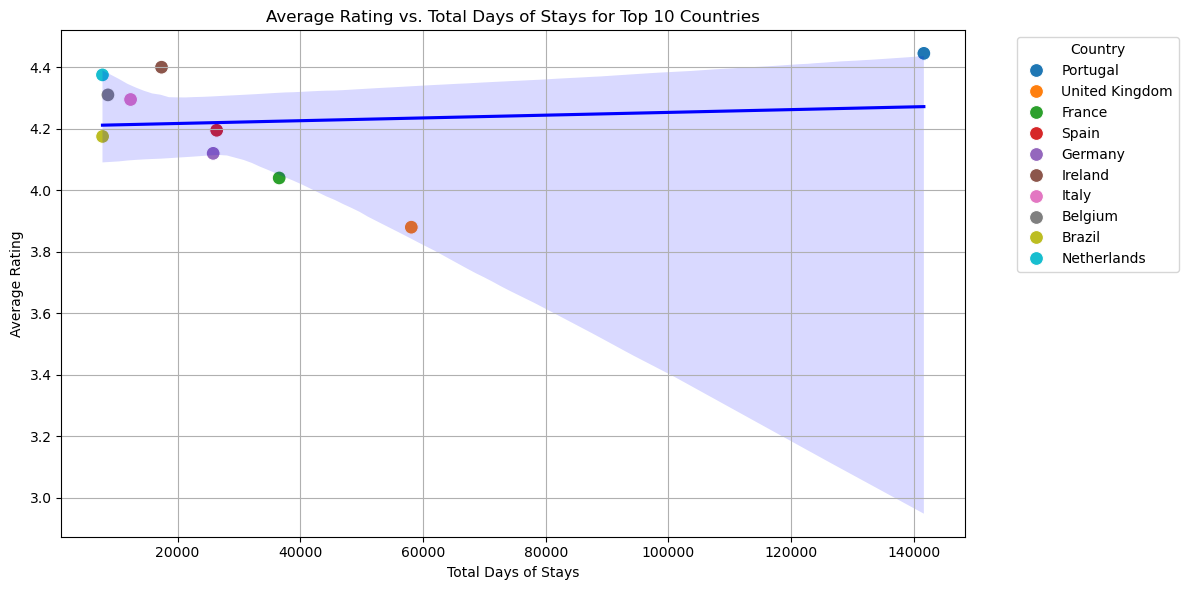

0.10419734487799258

In [10]:
# Create a scatter plot for average rating vs. total days of stays
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries, x='Total_Days_of_Stays', y='Average_Rating', hue='Country', s=100)

# Add a trend line using linear regression
sns.regplot(data=top_countries, x='Total_Days_of_Stays', y='Average_Rating', scatter=False, color='blue', line_kws={'label': 'Trend Line'})

# Customize the plot
plt.title('Average Rating vs. Total Days of Stays for Top 10 Countries')
plt.xlabel('Total Days of Stays')
plt.ylabel('Average Rating')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig("../Images/rating_vs_days_of_stay.png")
plt.show()

# Calculate the correlation coefficient
correlation = top_countries['Total_Days_of_Stays'].corr(top_countries['Average_Rating'])

# Output the correlation coefficient
correlation

Analysis: Does the number of higher total days of stays correlate with a higher average rating?
---

Analysis of the Correlation Coefficient (0.104)
Weak Positive Correlation:

The value of 0.104 indicates that as the total number of stays increases, there is a slight tendency for the average rating to increase as well. However, the correlation is weak, which means the relationship is not strong enough to suggest a significant connection.
Practical Implications:

The weak correlation suggests that the total number of stays does not substantially influence the average rating in these countries. Other factors likely play a more crucial role in determining hotel ratings, such as service quality, facilities, location, and guest experiences.
Visual Confirmation:

If you plotted the data, you would likely see a scatter plot with points widely dispersed around the regression line. The trend line may show a slight upward slope, but there would be considerable variability in the ratings at any given level of total stays.
Further Considerations:

The weak correlation indicates that while there is a slight trend, it is not strong enough to draw definitive conclusions. Other analyses might be necessary to explore different variables or factors that could impact the average rating, such as hotel type, country-specific attributes, or other customer reviews.

Conclusion
---
Overall, the correlation coefficient of 0.104 suggests that there is a weak positive relationship between the total number of stays and average ratings among the top 10 countries. This means that while more stays may be associated with slightly higher ratings, the relationship is not robust, and many other factors likely influence guest satisfaction and ratings. Further investigation into other variables might provide more insights into what affects hotel ratings in these countries.